# Imitation of statistics for an article

In this notebook, we reproduce the main statistics of the following article : https://doi.org/10.1158/1078-0432.CCR-20-1163 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading the dataset and preprocessing

### Reading

The dataset of this article used in this notebook is the ```Supplemental-table1.xlsx``` file.

In [2]:
df = pd.read_excel('data/Supplemental-table1.xlsx')
df

,Anonymous ID,EGA ID,Tumour type,Sex,Line of therapy,Immunotherapy regimen,Cohort,Reason for discontinuation,Best response,Age at advanced disease diagnosis,...,Alive_0,Time to progression (days),Progression_1,Clinical benefit,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Lymph related
0,14891,EGAD00001001961,LUNG,F,8,Nivolumab,Naive,Progression,Mixed,45,...,1,179,1,NCB,0.351869,11.095310,23.0729,4.1689,55.51575,Non-lymph related
1,18624,EGAD00001002047,AECA,F,10,Nivolumab,Naive,Progression,Stable disease,47,...,1,148,1,NCB,0.071464,3.876336,5.4552,0.7910,9.32352,Non-lymph related
2,21392,EGAD00001002544,OV,F,6,Monalizumab,Naive,Progression,Physician assessed SD,57,...,1,79,1,NCB,0.040394,2.415688,4.1274,4.0377,50.12008,Lymph related
3,21516,EGAD00001002546,SKCM,F,3,Ipilimumab,Naive,Death,Not evaluable,29,...,1,11,0,NCB,0.052774,6.235845,11.4871,0.6006,1.58550,Non-lymph related
4,22186,EGAD00001001966,LUNG,F,4,Atezolizumab,Naive,Progression,Stable disease,52,...,1,80,1,NCB,0.009323,4.606660,7.1503,1.8234,38.42695,Non-lymph related
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,39344,EGAD00001005839,UVM,F,1,Pembrolizumab,Treated,Ongoing,Physician assessed SD,64,...,0,232,1,DCB,0.011178,1.516827,1.5457,0.4231,12.48693,Non-lymph related
94,37899,EGAD00001005838,CHOL,F,2,Nivolumab,Naive,Death,Physician assessed PR,38,...,1,96,0,NCB,0.818233,2.247151,2.7416,11.2704,47.97376,Non-lymph related
95,37775,EGAD00001004934,HNSC,M,1,Avelumab/OX40 agonist PF-04518600,Naive,Progression,Stable disease,69,...,1,69,1,NCB,0.018982,3.848247,5.8036,8.7136,5.13403,Non-lymph related
96,38313,EGAD00001005844,ACC,F,3,Avelumab/Debio1143 (SMAC mimetic),Naive,Toxicity,Partial response,34,...,1,51,1,NCB,0.000000,5.617878,7.7940,0.0688,0.51364,Non-lymph related


### Preprocessing

### Delete non-naive patients
In the article, the authors only focus on naive patients, so we drop the non-naive patients.

In [3]:
df = df[df["Cohort"] == 'Naive']

### Select pertinent columns
For this notebook and the statistics, we need the following columns :
- The scores of the biomarkers : ```CD8+ T cell score```, ```Exome mut per mb```, ```Genome mut per mb```, ```CD274 expression```, and ```M1M2 expression```.
- The columns which indicates if the patient had a response or not : ```Clinical benefit```.
- The survival measures : ```Overall survival (days)``` and ```Time to progression (days)```.
- The event status (for surviving) : ```Alive_0``` and ```Progression_1```.
- The ```Lymph-related``` column, for M1M2 and CD8+ T cell score.
- The ```Immunotherapy regimen``` column, for the third part.

So let's select them.

In [4]:
#df = df.loc[:,["CD8+ T cell score","Exome mut per mb","Genome mut per mb","CD274 expression","M1M2 expression","Clinical benefit","Overall survival (days)","Time to progression (days)","Alive_0","Progression_1","Lymph related","Immunotherapy regimen","Tumour type"]]

### Preprocessing for CD8+ T cell score and M1-M2 macrophage score
For these biomarkers, the ```lymph-related``` patients are excluded of the cohort. So let's drop them.

In [5]:
df_cd8_m1m2 = df.loc[df["Lymph related"] == "Non-lymph related"]
df_cd8_m1m2

,Anonymous ID,EGA ID,Tumour type,Sex,Line of therapy,Immunotherapy regimen,Cohort,Reason for discontinuation,Best response,Age at advanced disease diagnosis,...,Alive_0,Time to progression (days),Progression_1,Clinical benefit,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Lymph related
0,14891,EGAD00001001961,LUNG,F,8,Nivolumab,Naive,Progression,Mixed,45,...,1,179,1,NCB,0.351869,11.095310,23.0729,4.1689,55.51575,Non-lymph related
1,18624,EGAD00001002047,AECA,F,10,Nivolumab,Naive,Progression,Stable disease,47,...,1,148,1,NCB,0.071464,3.876336,5.4552,0.7910,9.32352,Non-lymph related
3,21516,EGAD00001002546,SKCM,F,3,Ipilimumab,Naive,Death,Not evaluable,29,...,1,11,0,NCB,0.052774,6.235845,11.4871,0.6006,1.58550,Non-lymph related
4,22186,EGAD00001001966,LUNG,F,4,Atezolizumab,Naive,Progression,Stable disease,52,...,1,80,1,NCB,0.009323,4.606660,7.1503,1.8234,38.42695,Non-lymph related
6,40507,EGAD00001005877,LUNG,F,1,Pembrolizumab,Naive,Progression,Physician assessed PD,57,...,1,130,1,NCB,0.351194,1.432559,2.0742,9.6682,110.18996,Non-lymph related
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,39280,EGAD00001004933,LUNG,M,2,Pembrolizumab,Naive,Toxicity,Physician Assessed SD,60,...,1,401,0,DCB,0.695396,84.998501,96.4079,8.4768,86.62561,Non-lymph related
94,37899,EGAD00001005838,CHOL,F,2,Nivolumab,Naive,Death,Physician assessed PR,38,...,1,96,0,NCB,0.818233,2.247151,2.7416,11.2704,47.97376,Non-lymph related
95,37775,EGAD00001004934,HNSC,M,1,Avelumab/OX40 agonist PF-04518600,Naive,Progression,Stable disease,69,...,1,69,1,NCB,0.018982,3.848247,5.8036,8.7136,5.13403,Non-lymph related
96,38313,EGAD00001005844,ACC,F,3,Avelumab/Debio1143 (SMAC mimetic),Naive,Toxicity,Partial response,34,...,1,51,1,NCB,0.000000,5.617878,7.7940,0.0688,0.51364,Non-lymph related


## 1. Distribution study of biomarkers for DCB group and NCB group

In this section, we study, for each biomarker of this article, the distribution of their values for the group DCB (responders) et NCB (non responders). The results are boxplots.

In [6]:
from survivalAnalysis.BiomarkerDistribution import BiomarkerDistribution

plotter = BiomarkerDistribution()

### Splitting the dataframe into DCB group and NCB group

In [7]:
# TMB and CD274
dcb_group = df.loc[df["Clinical benefit"] == "DCB"]
ncb_group = df.loc[df["Clinical benefit"] == "NCB"]

# CD8 and M1M2
dcb_cd8_m1m2_group = df_cd8_m1m2.loc[df_cd8_m1m2["Clinical benefit"] == "DCB"]
ncb_cd8_m1m2_group = df_cd8_m1m2.loc[df_cd8_m1m2["Clinical benefit"] == "NCB"]

### TMB biomarker

#### Exome analysis

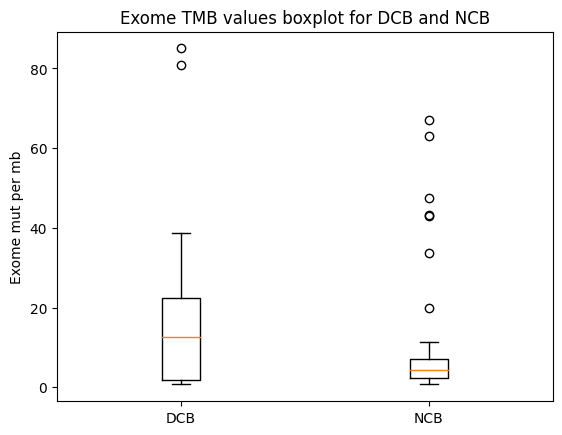

In [8]:
plotter.boxplot_values(dcb_group["Exome mut per mb"], ncb_group["Exome mut per mb"],"DCB","NCB","Exome mut per mb","Exome TMB values boxplot for DCB and NCB","figures/boxplot-tmb-exome.png")

#### Genome analysis

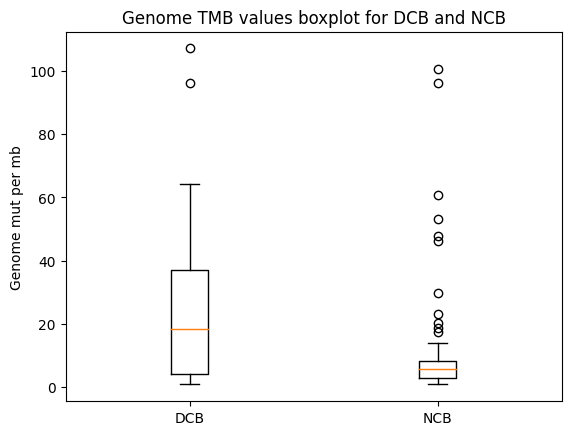

In [9]:
plotter.boxplot_values(dcb_group["Genome mut per mb"], ncb_group["Genome mut per mb"],"DCB","NCB","Genome mut per mb","Genome TMB values boxplot for DCB and NCB","figures/boxplot-tmb-genome.png")

### CD8+ T cell score

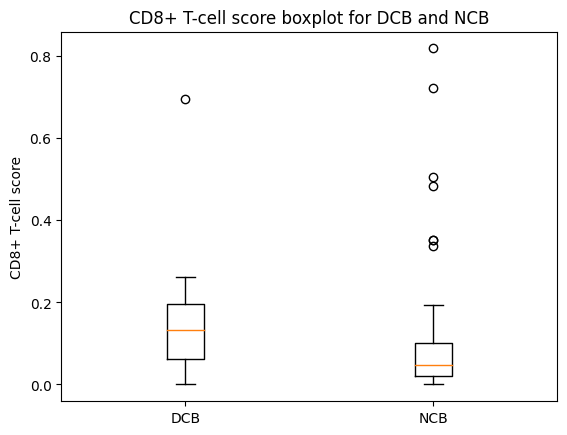

In [10]:
plotter.boxplot_values(dcb_cd8_m1m2_group["CD8+ T cell score"], ncb_cd8_m1m2_group["CD8+ T cell score"],"DCB","NCB","CD8+ T-cell score","CD8+ T-cell score boxplot for DCB and NCB","figures/boxplot-cd8score.png")

### M1-M2 macrophage score
For M1M2 scoring, we select only patients which are non lymph related.

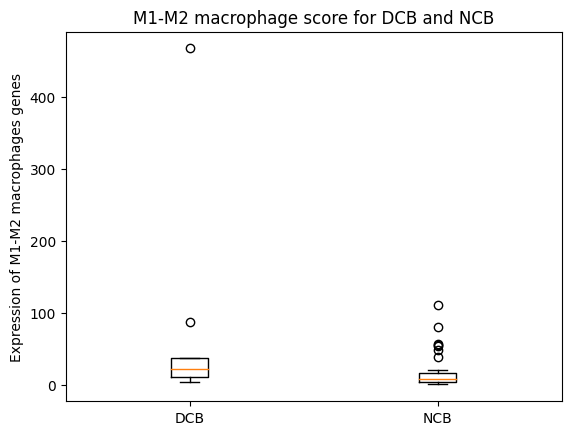

In [11]:
plotter.boxplot_values(dcb_cd8_m1m2_group["M1M2 expression"], ncb_cd8_m1m2_group["M1M2 expression"],"DCB","NCB","Expression of M1-M2 macrophages genes","M1-M2 macrophage score for DCB and NCB","figures/boxplot-m1m2score.png")

### CD274 expression score

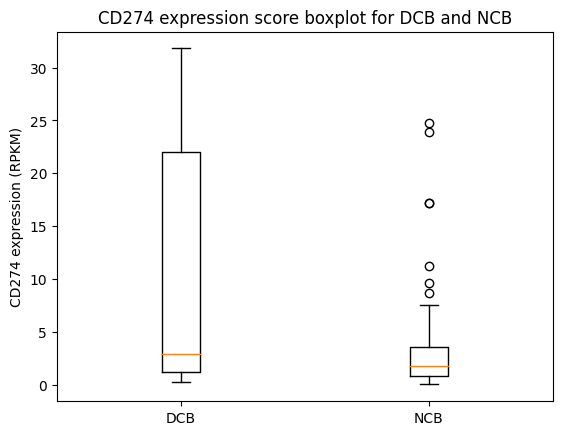

In [12]:
plotter.boxplot_values(dcb_group["CD274 expression"], ncb_group["CD274 expression"],"DCB","NCB","CD274 expression (RPKM)","CD274 expression score boxplot for DCB and NCB","figures/boxplot-cd274score.png")

## 2. Time To Progression (TTP) and Overall Survival (OS) curves
To estimate these curves, we use the Kaplan-Meier estimator. For each biomarker, we split the dataframe in 2 groups : people with high values of the biomarker, and people with low values of the biomarker.

In [13]:
from survivalAnalysis.KaplanMeier import KaplanMeier
from survivalAnalysis.LogRankTest import LogRankTest

km_estimator = KaplanMeier()
log_rank_tester = LogRankTest()

### Define the split function
We define the split function we will use for each biomarker.

In [14]:
def split_by_threshold(df: pd.DataFrame, column_name: str, threshold:float) -> tuple[pd.DataFrame, pd.DataFrame]:
    """ 
    Split the given dataframe into 2 groups depending on the value of column_name : under the threshold (low) and over the threshold (high).

    ### Parameters :
    - df : the given dataframe to split into 2 groups depending on the value of column_name.
    - column_name : the name of the column used to split
    - threshold : the threshold.

    ### Returns :
    The 2 groups, under the threshold and over the threshold.
    """
    low_group, high_group = df.loc[df[column_name]<threshold], df.loc[df[column_name]>=threshold]
    return low_group, high_group

### TMB

#### Exome analysis

In [15]:
# Splitting
low_exome_tmb, high_exome_tmb = split_by_threshold(df, "Exome mut per mb", 10)

##### TTP

In [16]:
# Formatting the data for the Kaplan Meier estimator
km_low_exome_tmb_ttp = np.array(list((low_exome_tmb[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])
km_high_exome_tmb_ttp = np.array(list((high_exome_tmb[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])

# Estimating the TTP curves
time_low_exome_tmb_ttp, ttp_low_exome_tmb = km_estimator.estimate_survival_function(km_low_exome_tmb_ttp['Progression_1'],km_low_exome_tmb_ttp['Time to progression (days)'])
time_high_exome_tmb_ttp, ttp_high_exome_tmb = km_estimator.estimate_survival_function(km_high_exome_tmb_ttp['Progression_1'],km_high_exome_tmb_ttp['Time to progression (days)'])

# Log-rank test : 
p_value_exome_tmb_ttp = log_rank_tester.stat_test(low_exome_tmb["Time to progression (days)"],low_exome_tmb["Progression_1"],high_exome_tmb["Time to progression (days)"],high_exome_tmb["Progression_1"])

##### OS

In [17]:
# Formatting the data for the Kaplan Meier estimator
km_low_exome_tmb_os = np.array(list((low_exome_tmb[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])
km_high_exome_tmb_os = np.array(list((high_exome_tmb[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])

# Estimating the TTP curves
time_low_exome_tmb_os, os_low_exome_tmb = km_estimator.estimate_survival_function(km_low_exome_tmb_os['Alive_0'],km_low_exome_tmb_os['Overall survival (days)'])
time_high_exome_tmb_os, os_high_exome_tmb = km_estimator.estimate_survival_function(km_high_exome_tmb_os['Alive_0'],km_high_exome_tmb_os['Overall survival (days)'])

# Log-rank test : 
p_value_exome_tmb_os = log_rank_tester.stat_test(low_exome_tmb["Overall survival (days)"],low_exome_tmb["Alive_0"],high_exome_tmb["Overall survival (days)"],high_exome_tmb["Alive_0"])

##### Plot the result

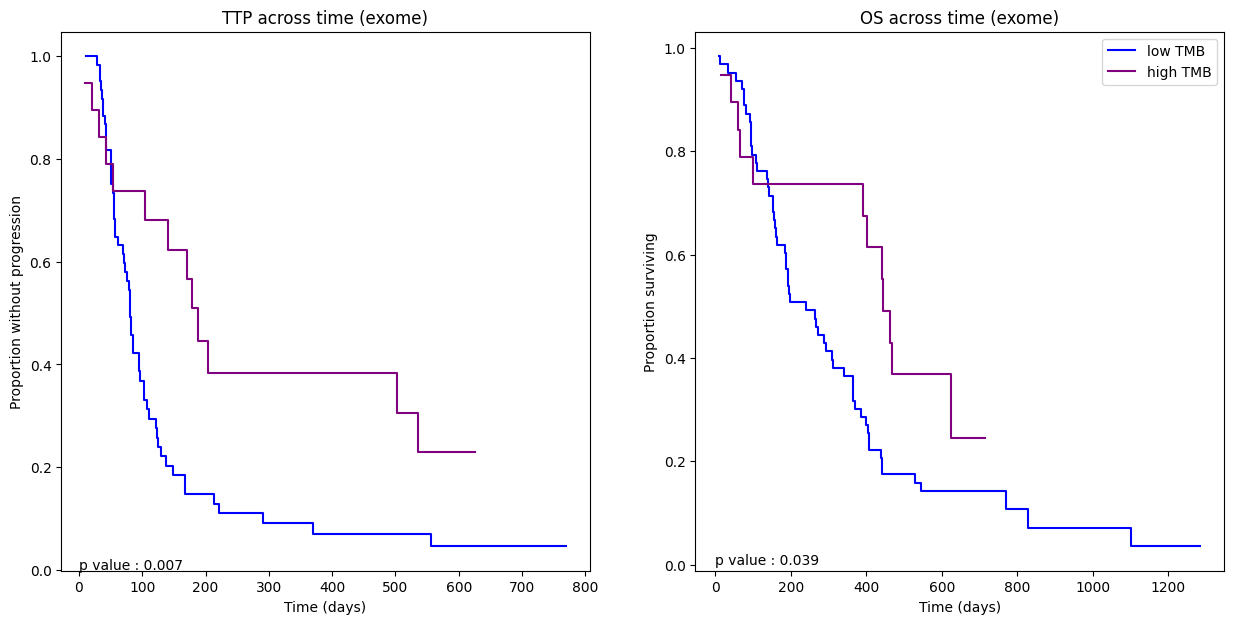

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

# TTP : 
ax[0].step(time_low_exome_tmb_ttp, ttp_low_exome_tmb, where='post',color='blue',label='low TMB')
ax[0].step(time_high_exome_tmb_ttp, ttp_high_exome_tmb, where='post',color='purple',label='high TMB')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Proportion without progression')
ax[0].set_title('TTP across time (exome)')
ax[0].text(0,0,f'p value : {p_value_exome_tmb_ttp}')

# OS : 
ax[1].step(time_low_exome_tmb_os, os_low_exome_tmb, where='post',color='blue',label='low TMB')
ax[1].step(time_high_exome_tmb_os, os_high_exome_tmb, where='post',color='purple',label='high TMB')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Proportion surviving')
ax[1].set_title('OS across time (exome)')
ax[1].text(0,0,f'p value : {p_value_exome_tmb_os}')

plt.legend()
plt.savefig('figures/survival-exome-tmb.png')

#### Genome analysis

In [19]:
# Splitting
low_genome_tmb, high_genome_tmb = split_by_threshold(df, "Genome mut per mb", 10)

##### TTP

In [20]:
# Formatting the data for the Kaplan Meier estimator
km_low_genome_tmb_ttp = np.array(list((low_genome_tmb[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])
km_high_genome_tmb_ttp = np.array(list((high_genome_tmb[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])

# Estimating the TTP curves
time_low_genome_tmb_ttp, ttp_low_genome_tmb = km_estimator.estimate_survival_function(km_low_genome_tmb_ttp['Progression_1'],km_low_genome_tmb_ttp['Time to progression (days)'])
time_high_genome_tmb_ttp, ttp_high_genome_tmb = km_estimator.estimate_survival_function(km_high_genome_tmb_ttp['Progression_1'],km_high_genome_tmb_ttp['Time to progression (days)'])

# Log-rank test : 
p_value_genome_tmb_ttp = log_rank_tester.stat_test(low_genome_tmb["Time to progression (days)"],low_genome_tmb["Progression_1"],high_genome_tmb["Time to progression (days)"],high_genome_tmb["Progression_1"])

##### OS

In [21]:
# Formatting the data for the Kaplan Meier estimator
km_low_genome_tmb_os = np.array(list((low_genome_tmb[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])
km_high_genome_tmb_os = np.array(list((high_genome_tmb[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])

# Estimating the TTP curves
time_low_genome_tmb_os, os_low_genome_tmb = km_estimator.estimate_survival_function(km_low_genome_tmb_os['Alive_0'],km_low_genome_tmb_os['Overall survival (days)'])
time_high_genome_tmb_os, os_high_genome_tmb = km_estimator.estimate_survival_function(km_high_genome_tmb_os['Alive_0'],km_high_genome_tmb_os['Overall survival (days)'])

# Log-rank test : 
p_value_genome_tmb_os = log_rank_tester.stat_test(low_genome_tmb["Overall survival (days)"],low_genome_tmb["Alive_0"],high_genome_tmb["Overall survival (days)"],high_genome_tmb["Alive_0"])

##### Plot the result

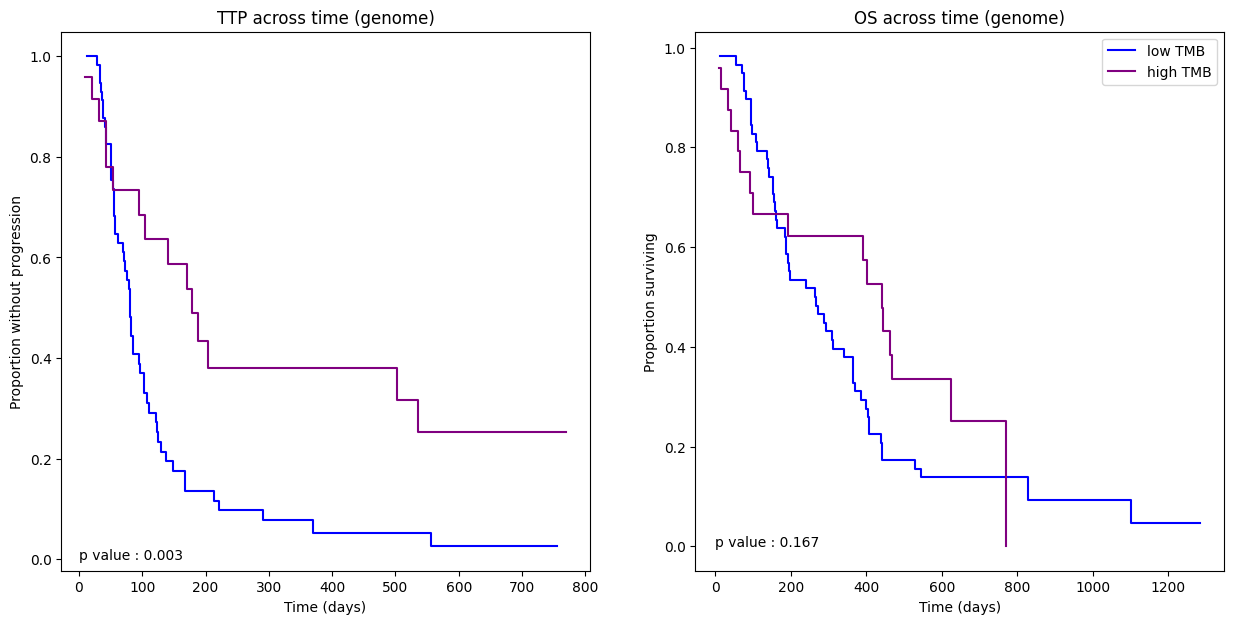

In [23]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

# TTP : 
ax[0].step(time_low_genome_tmb_ttp, ttp_low_genome_tmb, where='post',color='blue',label='low TMB')
ax[0].step(time_high_genome_tmb_ttp, ttp_high_genome_tmb, where='post',color='purple',label='high TMB')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Proportion without progression')
ax[0].set_title('TTP across time (genome)')
ax[0].text(0,0,f'p value : {p_value_genome_tmb_ttp}')

# OS : 
ax[1].step(time_low_genome_tmb_os, os_low_genome_tmb, where='post',color='blue',label='low TMB')
ax[1].step(time_high_genome_tmb_os, os_high_genome_tmb, where='post',color='purple',label='high TMB')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Proportion surviving')
ax[1].set_title('OS across time (genome)')
ax[1].text(0,0,f'p value : {p_value_genome_tmb_os}')

plt.legend()
plt.savefig('figures/survival-genome-tmb.png')

### CD8+ T-cell score

In [24]:
# Splitting
low_cd8, high_cd8 = split_by_threshold(df_cd8_m1m2, "CD8+ T cell score", 0.054)

#### TTP

In [25]:
# Formatting the data for the Kaplan Meier estimator
km_low_cd8_ttp = np.array(list((low_cd8[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])
km_high_cd8_ttp = np.array(list((high_cd8[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])

# Estimating the TTP curves
time_low_cd8_ttp, ttp_low_cd8 = km_estimator.estimate_survival_function(km_low_cd8_ttp['Progression_1'],km_low_cd8_ttp['Time to progression (days)'])
time_high_cd8_ttp, ttp_high_cd8 = km_estimator.estimate_survival_function(km_high_cd8_ttp['Progression_1'],km_high_cd8_ttp['Time to progression (days)'])

# Log-rank test : 
p_value_cd8_ttp = log_rank_tester.stat_test(low_cd8["Time to progression (days)"],low_cd8["Progression_1"],high_cd8["Time to progression (days)"],high_cd8["Progression_1"])

#### OS

In [26]:
# Formatting the data for the Kaplan Meier estimator
km_low_cd8_os = np.array(list((low_cd8[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])
km_high_cd8_os = np.array(list((high_cd8[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])

# Estimating the OS curves
time_low_cd8_os, os_low_cd8 = km_estimator.estimate_survival_function(km_low_cd8_os['Alive_0'],km_low_cd8_os['Overall survival (days)'])
time_high_cd8_os, os_high_cd8 = km_estimator.estimate_survival_function(km_high_cd8_os['Alive_0'],km_high_cd8_os['Overall survival (days)'])

# Log-rank test : 
p_value_cd8_os = log_rank_tester.stat_test(low_cd8["Overall survival (days)"],low_cd8["Alive_0"],high_cd8["Overall survival (days)"],high_cd8["Alive_0"])

#### Plot the result

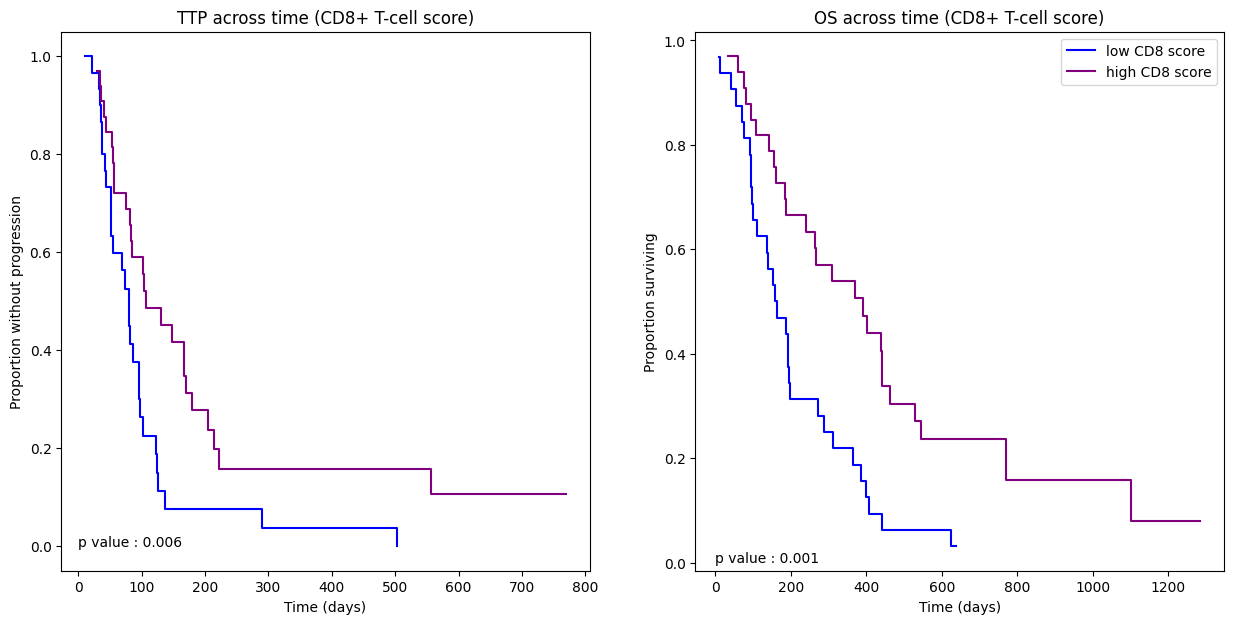

In [27]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

# TTP : 
ax[0].step(time_low_cd8_ttp, ttp_low_cd8, where='post',color='blue',label='low CD8 score')
ax[0].step(time_high_cd8_ttp, ttp_high_cd8, where='post',color='purple',label='high CD8 score')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Proportion without progression')
ax[0].set_title('TTP across time (CD8+ T-cell score)')
ax[0].text(0,0,f'p value : {p_value_cd8_ttp}')

# OS : 
ax[1].step(time_low_cd8_os, os_low_cd8, where='post',color='blue',label='low CD8 score')
ax[1].step(time_high_cd8_os, os_high_cd8, where='post',color='purple',label='high CD8 score')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Proportion surviving')
ax[1].set_title('OS across time (CD8+ T-cell score)')
ax[1].text(0,0,f'p value : {p_value_cd8_os}')

plt.legend()
plt.savefig('figures/survival-cd8.png')

### M1-M2 macrophage score

For M1M2 again, we need to keep only the non-lymph related columns.

In [28]:
# Splitting
low_m1m2, high_m1m2 = split_by_threshold(df_cd8_m1m2, "M1M2 expression", 8.51)

#### TTP

In [29]:
# Formatting the data for the Kaplan Meier estimator
km_low_m1m2_ttp = np.array(list((low_m1m2[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])
km_high_m1m2_ttp = np.array(list((high_m1m2[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])

# Estimating the TTP curves
time_low_m1m2_ttp, ttp_low_m1m2 = km_estimator.estimate_survival_function(km_low_m1m2_ttp['Progression_1'],km_low_m1m2_ttp['Time to progression (days)'])
time_high_m1m2_ttp, ttp_high_m1m2 = km_estimator.estimate_survival_function(km_high_m1m2_ttp['Progression_1'],km_high_m1m2_ttp['Time to progression (days)'])

# Log-rank test : 
p_value_m1m2_ttp = log_rank_tester.stat_test(low_m1m2["Time to progression (days)"],low_m1m2["Progression_1"],high_m1m2["Time to progression (days)"],high_m1m2["Progression_1"])

#### OS

In [30]:
# Formatting the data for the Kaplan Meier estimator
km_low_m1m2_os = np.array(list((low_m1m2[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])
km_high_m1m2_os = np.array(list((high_m1m2[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])

# Estimating the OS curves
time_low_m1m2_os, os_low_m1m2 = km_estimator.estimate_survival_function(km_low_m1m2_os['Alive_0'],km_low_m1m2_os['Overall survival (days)'])
time_high_m1m2_os, os_high_m1m2 = km_estimator.estimate_survival_function(km_high_m1m2_os['Alive_0'],km_high_m1m2_os['Overall survival (days)'])

# Log-rank test : 
p_value_m1m2_os = log_rank_tester.stat_test(low_m1m2["Overall survival (days)"],low_m1m2["Alive_0"],high_m1m2["Overall survival (days)"],high_m1m2["Alive_0"])

#### Plot the result

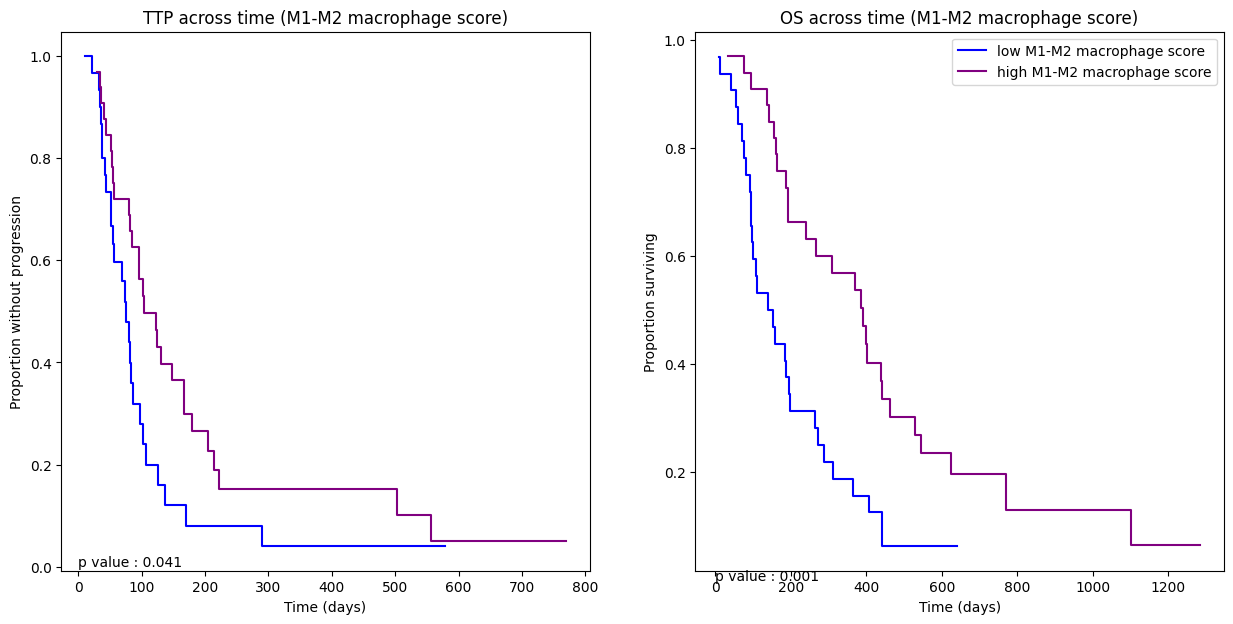

In [31]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

# TTP : 
ax[0].step(time_low_m1m2_ttp, ttp_low_m1m2, where='post',color='blue',label='low M1-M2 macrophage score')
ax[0].step(time_high_m1m2_ttp, ttp_high_m1m2, where='post',color='purple',label='high M1-M2 macrophage score')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Proportion without progression')
ax[0].set_title('TTP across time (M1-M2 macrophage score)')
ax[0].text(0,0,f'p value : {p_value_m1m2_ttp}')

# OS : 
ax[1].step(time_low_m1m2_os, os_low_m1m2, where='post',color='blue',label='low M1-M2 macrophage score')
ax[1].step(time_high_m1m2_os, os_high_m1m2, where='post',color='purple',label='high M1-M2 macrophage score')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Proportion surviving')
ax[1].set_title('OS across time (M1-M2 macrophage score)')
ax[1].text(0,0,f'p value : {p_value_m1m2_os}')

plt.legend()
plt.savefig('figures/survival-m1m2.png')

### CD274 gene expression

In [32]:
# Splitting
low_cd274, high_cd274 = split_by_threshold(df, "CD274 expression", 4.77)

#### TTP

In [33]:
# Formatting the data for the Kaplan Meier estimator
km_low_cd274_ttp = np.array(list((low_cd274[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])
km_high_cd274_ttp = np.array(list((high_cd274[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])

# Estimating the TTP curves
time_low_cd274_ttp, ttp_low_cd274 = km_estimator.estimate_survival_function(km_low_cd274_ttp['Progression_1'],km_low_cd274_ttp['Time to progression (days)'])
time_high_cd274_ttp, ttp_high_cd274 = km_estimator.estimate_survival_function(km_high_cd274_ttp['Progression_1'],km_high_cd274_ttp['Time to progression (days)'])

# Log-rank test : 
p_value_cd274_ttp = log_rank_tester.stat_test(low_cd274["Time to progression (days)"],low_cd274["Progression_1"],high_cd274["Time to progression (days)"],high_cd274["Progression_1"])

#### OS

In [34]:
# Formatting the data for the Kaplan Meier estimator
km_low_cd274_os = np.array(list((low_cd274[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])
km_high_cd274_os = np.array(list((high_cd274[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])

# Estimating the OS curves
time_low_cd274_os, os_low_cd274 = km_estimator.estimate_survival_function(km_low_cd274_os['Alive_0'],km_low_cd274_os['Overall survival (days)'])
time_high_cd274_os, os_high_cd274 = km_estimator.estimate_survival_function(km_high_cd274_os['Alive_0'],km_high_cd274_os['Overall survival (days)'])

# Log-rank test : 
p_value_cd274_os = log_rank_tester.stat_test(low_cd274["Overall survival (days)"],low_cd274["Alive_0"],high_cd274["Overall survival (days)"],high_cd274["Alive_0"])

#### Plot the result

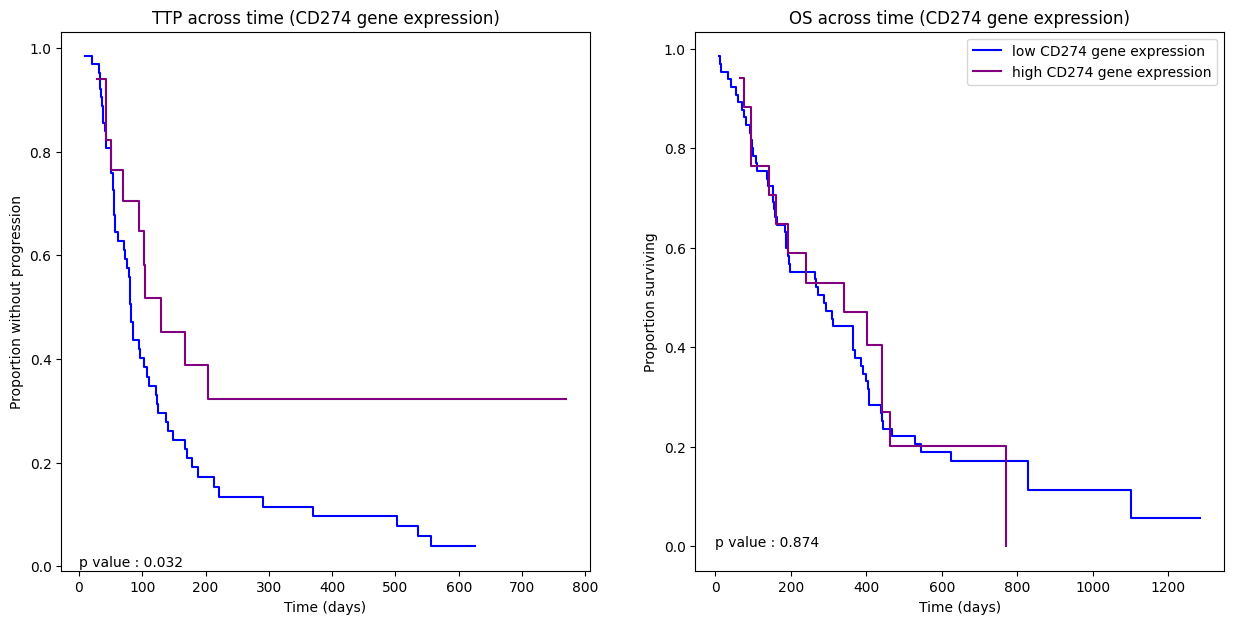

In [35]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

# TTP : 
ax[0].step(time_low_cd274_ttp, ttp_low_cd274, where='post',color='blue',label='low CD274 gene expression')
ax[0].step(time_high_cd274_ttp, ttp_high_cd274, where='post',color='purple',label='high CD274 gene expression')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Proportion without progression')
ax[0].set_title('TTP across time (CD274 gene expression)')
ax[0].text(0,0,f'p value : {p_value_cd274_ttp}')

# OS : 
ax[1].step(time_low_cd274_os, os_low_cd274, where='post',color='blue',label='low CD274 gene expression')
ax[1].step(time_high_cd274_os, os_high_cd274, where='post',color='purple',label='high CD274 gene expression')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Proportion surviving')
ax[1].set_title('OS across time (CD274 gene expression)')
ax[1].text(0,0,f'p value : {p_value_cd274_os}')

plt.legend()
plt.savefig('figures/survival-cd274.png')

## 3. Hazard ratio (bug)
Now we want to train a Cox regression model to find the hazard ratio for each biomarker.

### Preprocessing
For each biomarker, the following preprocessing is made : 
- Delete the rows with LYMP in the tumour type or Lymph-related in the Lymph-related column.
- Delete the rows with a non evaluable response (Best response column).

### Select columns

In [53]:
df_hr = df.loc[df["Lymph related"]!="Lymph related"]
df_hr = df_hr.loc[df["Tumour type"]!="LYMP"]
df_hr = df_hr.loc[df["Best response"]!="Not evaluable"]
df_hr = df_hr.loc[:,["CD8+ T cell score","Genome mut per mb","M1M2 expression","CD274 expression","Time to progression (days)","Progression_1","Overall survival (days)","Alive_0"]]
df_hr

,CD8+ T cell score,Genome mut per mb,M1M2 expression,CD274 expression,Time to progression (days),Progression_1,Overall survival (days),Alive_0
0,0.351869,23.072900,55.51575,4.1689,179,1,391,1
1,0.071464,5.455200,9.32352,0.7910,148,1,544,1
4,0.009323,7.150300,38.42695,1.8234,80,1,385,1
6,0.351194,2.074200,110.18996,9.6682,130,1,160,1
10,0.202788,107.184000,19.27326,1.7444,184,0,184,0
11,0.000000,7.047600,7.78044,0.9796,73,1,111,1
12,0.262311,2.714000,467.93886,3.1427,222,1,309,1
13,0.060953,33.695000,5.25660,0.2410,578,0,578,0
14,0.001192,2.053900,0.84480,0.3580,81,1,313,1
15,0.034957,4.353200,2.06238,0.9012,38,1,154,1


In [97]:
## CD8 : 
high_cd8_hr = high_cd8.loc[high_cd8["Best response"]!="Not evaluable"]
high_cd8_hr = high_cd8_hr.loc[:,["CD8+ T cell score","Exome mut per mb","Genome mut per mb","CD274 expression","M1M2 expression","Time to progression (days)","Progression_1","Overall survival (days)","Alive_0"]]

## M1M2 : 
high_m1m2_hr = high_m1m2.loc[high_m1m2["Best response"]!="Not evaluable"]
high_m1m2_hr = high_m1m2_hr.loc[:,["CD8+ T cell score","Exome mut per mb","Genome mut per mb","CD274 expression","M1M2 expression","Time to progression (days)","Progression_1","Overall survival (days)","Alive_0"]]

## CD274 : 
high_cd274_hr = high_cd274.loc[high_cd274["Lymph related"] == "Non-lymph related"]
high_cd274_hr = high_cd274_hr.loc[high_cd274_hr["Best response"]!="Not evaluable"]
high_cd274_hr = high_cd274_hr.loc[:,["CD8+ T cell score","Exome mut per mb","Genome mut per mb","CD274 expression","M1M2 expression","Time to progression (days)","Progression_1","Overall survival (days)","Alive_0"]]

## TMB (genome) : 
high_genome_tmb_hr = high_genome_tmb.loc[high_genome_tmb["Lymph related"] == "Non-lymph related"]
high_genome_tmb_hr = high_genome_tmb_hr.loc[high_genome_tmb_hr["Best response"]!="Not evaluable"]
high_genome_tmb_hr = high_genome_tmb_hr.loc[:,["CD8+ T cell score","Exome mut per mb","Genome mut per mb","CD274 expression","M1M2 expression","Time to progression (days)","Progression_1","Overall survival (days)","Alive_0"]]

In [98]:
high_cd8_hr

,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Time to progression (days),Progression_1,Overall survival (days),Alive_0
0,0.351869,11.095310,23.072900,4.1689,55.51575,179,1,391,1
1,0.071464,3.876336,5.455200,0.7910,9.32352,148,1,544,1
6,0.351194,1.432559,2.074200,9.6682,110.18996,130,1,160,1
10,0.202788,80.953628,107.184000,1.7444,19.27326,184,0,184,0
12,0.262311,1.404470,2.714000,3.1427,467.93886,222,1,309,1
13,0.060953,17.612049,33.695000,0.2410,5.25660,578,0,578,0
16,0.085451,2.724671,4.322500,2.3061,10.39606,41,1,155,1
19,0.139384,16.348026,16.019400,25.7392,23.19457,204,1,462,1
20,0.483515,1.376380,1.456300,17.1535,80.26835,102,1,442,1
23,0.173110,1.095486,1.042300,1.1816,14.09756,557,1,699,0


In [194]:
# binary_tumour_type = pd.get_dummies(high_cd274["Tumour type"], prefix = 'tumour', dtype=int)
# high_cd274_hr = pd.concat([high_cd274,binary_tumour_type],axis=1)
# high_cd8.shape

(33, 21)

In [35]:
# ## TMB (exome)
# counts_tumour_tmb = high_exome_tmb['Tumour type'].value_counts()
# high_exome_tmb_hr = high_exome_tmb[~high_exome_tmb['Tumour type'].isin(counts_tumour_tmb[counts_tumour_tmb<2].index)]

# ## CD274
# counts_tumour_cd274 = high_cd274['Tumour type'].value_counts()
# high_cd274_hr = high_cd274[~high_cd274['Tumour type'].isin(counts_tumour_cd274[counts_tumour_cd274<2].index)]

# ## CD8
# counts_tumour_cd8 = high_cd8['Tumour type'].value_counts()
# high_cd8_hr = high_cd8[~high_cd8['Tumour type'].isin(counts_tumour_cd8[counts_tumour_cd8<2].index)]

# ## M1-M2
# counts_tumour_m1m2 = high_m1m2['Tumour type'].value_counts()
# high_m1m2_hr = high_m1m2[~high_m1m2['Tumour type'].isin(counts_tumour_m1m2[counts_tumour_m1m2<2].index)]

In [99]:
from survivalAnalysis.CoxRegression import CoxRegression

cox_model = CoxRegression()

In [103]:
cph = cox_model.compute_hazard_function(high_cd8_hr.loc[:,["CD8+ T cell score","Overall survival (days)","Alive_0"]], "Overall survival (days)","Alive_0")
cph.hazard_ratios_

covariate
CD8+ T cell score    1.048424
Name: exp(coef), dtype: float64

In [58]:
high_cd8_hr

NameError: name 'high_cd8_hr' is not defined

#### TTP

##### CD8+ T cell score

In [232]:
cph = cox_model.compute_hazard_function(high_cd8_hr.loc[:,["CD8+ T cell score","Time to progression (days)","Progression_1"]],"Time to progression (days)","Progression_1")
cph.hazard_ratios_

covariate
CD8+ T cell score    0.365134
Name: exp(coef), dtype: float64

##### M1-M2 macrophage score

In [233]:
cph = cox_model.compute_hazard_function(high_m1m2_hr.loc[:,["M1M2 expression","Time to progression (days)","Progression_1"]],"Time to progression (days)","Progression_1")
cph.hazard_ratios_

covariate
M1M2 expression    0.997678
Name: exp(coef), dtype: float64

##### Exome TMB

In [234]:
cph = cox_model.compute_hazard_function(high_exome_tmb_hr.loc[:,["Exome mut per mb","Time to progression (days)","Progression_1"]],"Time to progression (days)","Progression_1")
cph.hazard_ratios_

covariate
Exome mut per mb    0.990156
Name: exp(coef), dtype: float64

##### CD274

In [235]:
cph = cox_model.compute_hazard_function(high_cd274_hr.loc[:,["CD274 expression","Time to progression (days)","Progression_1"]],"Time to progression (days)","Progression_1")
cph.hazard_ratios_

covariate
CD274 expression    0.958443
Name: exp(coef), dtype: float64

### Cox regression model for TTP
To fit the Cox Regression model, we need the biomarker columns, the TTP column, and the TTP status column. Let's drop the other columns.

#### CD8+ T cell score
In the article, only the high CD8+ T cell score lines are used. So let's keep them.

In [53]:
high_cd8_ttp = high_cd8.drop(["Clinical benefit","Overall survival (days)","Alive_0"],axis=1)
high_cd8_ttp

,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Time to progression (days),Progression_1
0,0.351869,11.095310,23.072900,4.1689,55.51575,179,1
1,0.071464,3.876336,5.455200,0.7910,9.32352,148,1
6,0.351194,1.432559,2.074200,9.6682,110.18996,130,1
10,0.202788,80.953628,107.184000,1.7444,19.27326,184,0
12,0.262311,1.404470,2.714000,3.1427,467.93886,222,1
13,0.060953,17.612049,33.695000,0.2410,5.25660,578,0
16,0.085451,2.724671,4.322500,2.3061,10.39606,41,1
17,0.680930,0.926950,1.329600,27.3710,98.38025,756,0
19,0.139384,16.348026,16.019400,25.7392,23.19457,204,1
20,0.483515,1.376380,1.456300,17.1535,80.26835,102,1


#### Compute the coefficients

In [54]:
from survivalAnalysis.CoxRegression import CoxRegression

cox_model = CoxRegression()
cph = cox_model.compute_hazard_function(high_cd8_ttp, 'Time to progression (days)','Progression_1')

#### Plot the result

In [55]:
#fig, ax = plt.subplots(figsize=(10,6))
cph.hazard_ratios_

covariate
CD8+ T cell score    1.450492
Exome mut per mb     1.025457
Genome mut per mb    0.968453
CD274 expression     0.958745
M1M2 expression      0.998905
Name: exp(coef), dtype: float64